In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#%% p.4 factorial
from math import factorial
factorial(10) #10!=10*9*8*...*2*1

3628800

 **Ex1> (De Mere problems) Calculate the probabilities
 that**

1. by throwing dice 4 times, one gets at least one 6 (ans: 0.518)
2. by throwing two dices 24 times, one gets at least one pair of 6 (ans: 0.491) hint: P(at least one) = 1 − P(none)



In [ ]:
#%% #randint=random integer
from numpy.random import randint
#randint(min,max,n) #n integers betwen min...max-1, 1D-array, (n,)
#randint(min,max,(m,n)) #mxn-matrix, (m,n)

In [ ]:
#%% p.6, dice 4 times
N=100000 #number of simulation rounds
case1=0

for n in range(N):
  result=randint(1,7,4)
  if np.max(result) == 6:
    case1+=1

print(case1/N)


#Theoretically
a = 1 # all possibility
b = (5/6)**4 #No 6 in 4 throw possibility
c = 1 - (5/6)**4 # at least one six
print(c)

0.51781
0.5177469135802468


In [ ]:
N = 100000  # number of simulation rounds
case2 = 0  # at least one pair of 6

for i in range(0,N):
    result = randint(1, 7, (2, 24))  # rolling two dice 24 times
    if np.any(np.sum(result == 6, axis=0) == 2):
        case2 += 1

print(case2/N)
a = 1 # all possibility
b = (35/36)**24 #No double 6 in 4 throw possibility
c = 1 - b # at least one pair of six
print(c)

0.49204
0.4914038761309034


**Ex 2: Calculate by simulation the probability that among n person at least 3 have same birthday**

In [ ]:
#%% simulation
K=100000#simulation rounds
n=100 #number of persons
at_least_3_same_sp=0

for k in range(K):
  sp=np.random.randint(1,366,n)
  u,c = np.unique(sp,return_counts = True) #different elements in birthdays
  if np.max(c) >= 3:
    at_least_3_same_sp+=1

print(at_least_3_same_sp/K)

0.64559


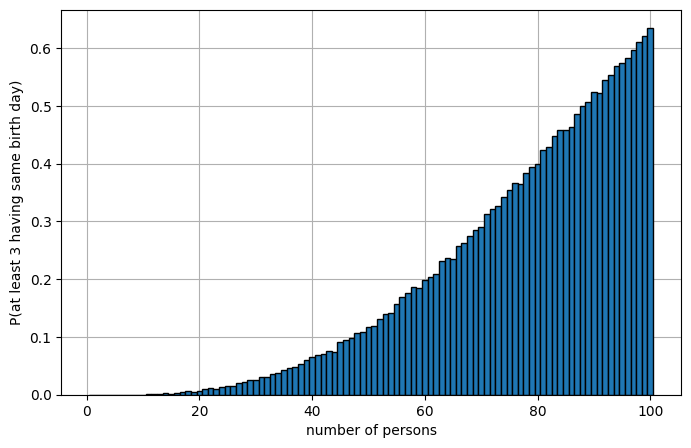

In [ ]:
N = 100  # max number of persons
p = np.zeros(N)
K = 10000  # simulation rounds

p[0] = 0
for n in range(1, N):
    at_least_3_same_sp = 0  # Reset the count for each group size
    for k in range(K):
        sp = np.random.randint(1, 366, n)
        u, c = np.unique(sp, return_counts=True)  # different elements in birthdays
        if np.max(c) >= 3:
            at_least_3_same_sp += 1

    p[n] = at_least_3_same_sp / K

plt.figure(figsize=(8, 5))
x = np.arange(1, N + 1, 1)
plt.bar(x, p, zorder=2, width=1, edgecolor='k')  # zorder=2 ->grid-lines behind bars
plt.grid()
plt.xlabel('number of persons')
plt.ylabel('P(at least 3 having same birth day)')
plt.show()

Ex 3 the coupon collector’s problem describes ”collect
 all coupons and win”contests. It asks the following
 question: If each box of a brand of cereals contains a
 coupon, and there are n different types of coupons,
 calculate by simulation the probability that by buying t boxes, one finds all n different coupons

In [ ]:
n = 10

#Change here
t = 30

win = 0
K= 1000000

for k in range(K):
  coupons=randint(1,n + 1,t)
  win_rate=np.unique(coupons)
  if win_rate.size == 10:
    win+=1

print(win/K)

0.628461


Ex 4 Arrange numbers 1,2,...,n to a random order.
 Calculate by simulation the probability that
 k = 0,1,...,n numbers stay at their original places
 and draw a picture like below.


In [ ]:
#%%
from numpy.random import permutation

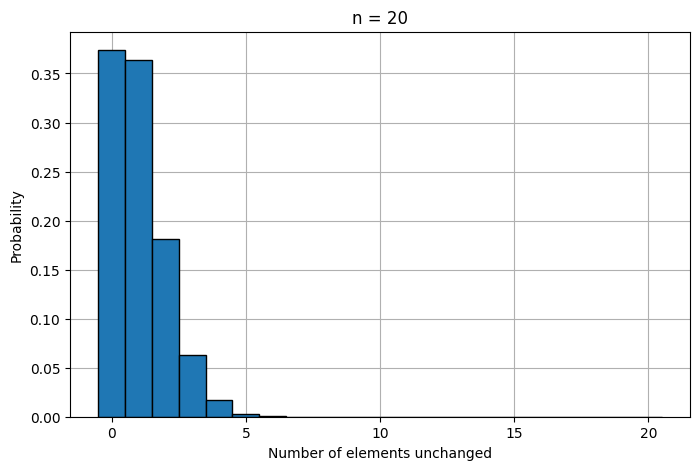

In [ ]:
N = 20
original_order = np.arange(1, N + 1)
K = 10000
p = np.zeros(N + 1)  # Initialize probability array

for n in range(N + 1):  # Loop from 0 to N
    dif = 0
    for k in range(K):
        new_order = np.random.permutation(original_order)
        inplace = np.sum(original_order == new_order)  # Number of elements in the same position
        if inplace == n:  # If all elements are in the same position
            dif += 1
    p[n] = dif / K

plt.figure(figsize=(8, 5))
x = np.arange(0, N + 1, 1)
plt.bar(x, p, zorder=2, width=1, edgecolor='k')
plt.grid()
plt.xlabel('Number of elements unchanged')
plt.ylabel('Probability')
plt.title('n = 20')
plt.show()

Ex 5 In the grid below the traveller can move either
 one step right or up. Traveller starts at A = [0,0]
 and chooses the moves randomly. Given m and n,
 calculate the probability that traveller goes through
 point B = [m,n]. Test by simulation.

In [ ]:
from scipy.special import comb
n=10
k=4
print(comb(n,k))

210.0


In [ ]:
m = 8
n = 5
complete = 0
K = 100000

for k in range(K):
    route = randint(0, 2, m + n)  # Generate a random route
    # Check if the number of steps going right equals m
    if np.sum(route == 1) == m:
        complete += 1

print("Simulated probability:", complete / K)
print("Theoretical probability:", comb(m + n, m) / 2**(m+n))

Simulated probability: 0.15557
Theoretical probability: 0.1571044921875


Ex 6  Keno: player chooses 10 numbers from 1,2,...,70.
 There are 20 winning and 50 non-winning numbers.
 Calculate the probabilities that player chooses 0,1,...,10
 winning numbers and test by simulation.


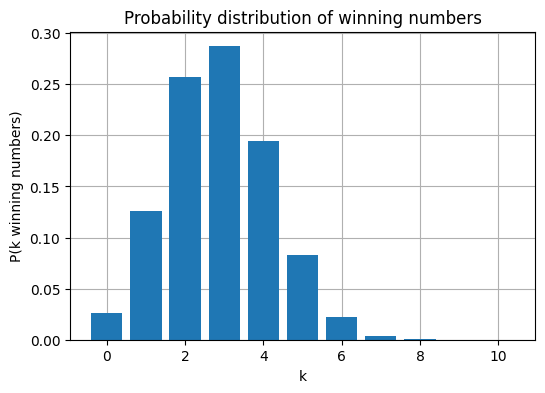

[2.58940283e-02 1.26312333e-01 2.57135821e-01 2.87035335e-01
 1.94075028e-01 8.28053451e-02 2.25014525e-02 3.83003446e-03
 3.88987875e-04 2.11694082e-05 4.65726980e-07]


In [ ]:
#Theoretical
n = 10  # Total number of numbers in the pool
p = 70  # Size of the pool
w = 20  # Number of winning numbers

probabilities = np.zeros(n + 1)  # Initialize array to store probabilities

for k in range(n + 1):  # Corrected the loop range
    probabilities[k] = comb(w, k) * comb(p - w, n - k) / comb(p, n)

x = np.arange(0, n + 1)
plt.figure(figsize=(6, 4))
plt.bar(x, probabilities, zorder=2, label='Theoretical')
plt.grid()
plt.xlabel('k')
plt.ylabel('P(k winning numbers)')
plt.title('Probability distribution of winning numbers')
plt.show()

print(probabilities)

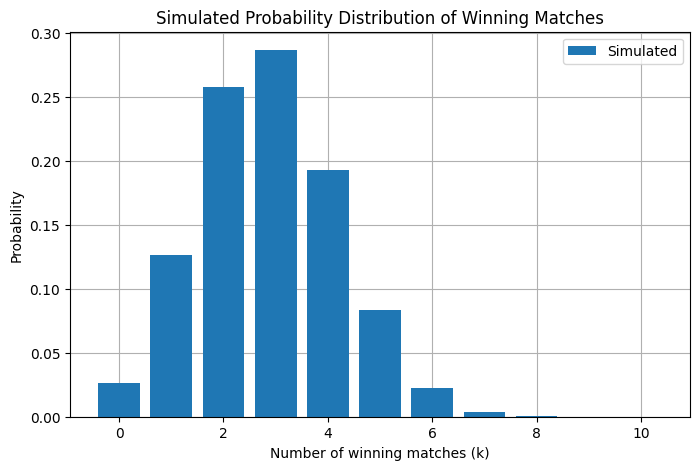

[0.02646 0.12635 0.25771 0.28667 0.19302 0.08332 0.02251 0.00361 0.00035
 0.      0.     ]


In [ ]:
#Simulate
numbers = np.arange(1, 71, 1)
winning_numbers = permutation(numbers)[:20]

k_winning = np.zeros(11)

N = 100000

for n in range(N):
    own_numbers = permutation(numbers)[:10]
    winning = np.intersect1d(own_numbers, winning_numbers)
    k = winning.size
    k_winning[k] += 1

plt.figure(figsize=(8, 5))
x = np.arange(0, 11, 1)
plt.bar(x, k_winning / N, zorder=2, label='Simulated')
plt.grid()
plt.xlabel('Number of winning matches (k)')
plt.ylabel('Probability')
plt.title('Simulated Probability Distribution of Winning Matches')
plt.legend()
plt.show()
print(k_winning/N)

Ex 7 In lotto, 7 numbers from 1,2,...,39 are chosen.
 Calculate by simulation the probability there are no
 consecutive numbers (ans. 0.28)

In [ ]:
numbers = np.arange(1, 40)

N = 100000
non_consecutive_count = 0

for k in range(N):
    own_numbers = permutation(numbers)[:7]  # Generate a set of 7 random numbers
    sorted_own_numbers = np.sort(own_numbers)
    consecutive = False
    for i in range(1, 7):
        if sorted_own_numbers[i] == sorted_own_numbers[i - 1] + 1:
            consecutive = True
            break
    if not consecutive:
        non_consecutive_count += 1

rate = non_consecutive_count / N
print( rate)

0.27722


Ex 8 Deal 52 cards to 4 persons, 13 to each.
 Calculate by simulation the probabilities
 P(each person gets one ace (= number 1))
 P(each person gets cards from each 4 suites)
 (ans: 0.0106/0.1055)

In [ ]:
#Set up a deck
numbers=np.arange(1,14)
numbers=np.hstack((numbers,numbers,numbers,numbers))
suit=np.ones(13)
suit=np.hstack((suit,2*suit,3*suit,4*suit))
deck=np.zeros((52,2))
deck[:,0]=numbers
deck[:,1]=suit

In [ ]:
N = 100000
each_person_get_one_ace = 0
each_person_get_a_card_from_each_suit = 0

for n in range(N):
    ind = np.random.permutation(52)
    hand = deck[ind, :]
    person1 = hand[:13, :]
    person2 = hand[13:26, :]
    person3 = hand[26:39, :]
    person4 = hand[39:52, :]

    #ace in each other hand
    has_ace_person1 = np.min(person1[:, 0])
    has_ace_person2 = np.min(person2[:, 0])
    has_ace_person3 = np.min(person3[:, 0])
    has_ace_person4 = np.min(person4[:, 0])

    # Check if all players have at least one ace
    if (has_ace_person1 == 1) and (has_ace_person2 == 1) and (has_ace_person3 == 1) and (has_ace_person4 == 1):
        each_person_get_one_ace += 1

    suits_person1 = np.unique(person1[:, 1])
    suits_person2 = np.unique(person2[:, 1])
    suits_person3 = np.unique(person3[:, 1])
    suits_person4 = np.unique(person4[:, 1])

    # Check if each person has at least one card from each suit
    if (len(suits_person1) == 4) and (len(suits_person2) == 4) and (len(suits_person3) == 4) and (len(suits_person4) == 4):
        each_person_get_a_card_from_each_suit += 1


print(each_person_get_one_ace/N)
print(each_person_get_a_card_from_each_suit/N)

0.10634
0.81506


Ex9: Exam contains 20 questions, each with 4 answer al
ternatives (of which one is right). Calculate probabi
lities that one gets k = 0,1,2,...,20 questions right
 by guessing and test by simulation.

In [ ]:
n=20 #number of repeats
p=0.25 #P(result 1)
pk=np.zeros(n+1) #% p[k]=P(k ones)
#from scipy.special import comb
for k in range(n+1):
    pk[k]=comb(n,k)*p**k*(1-p)**(n-k)


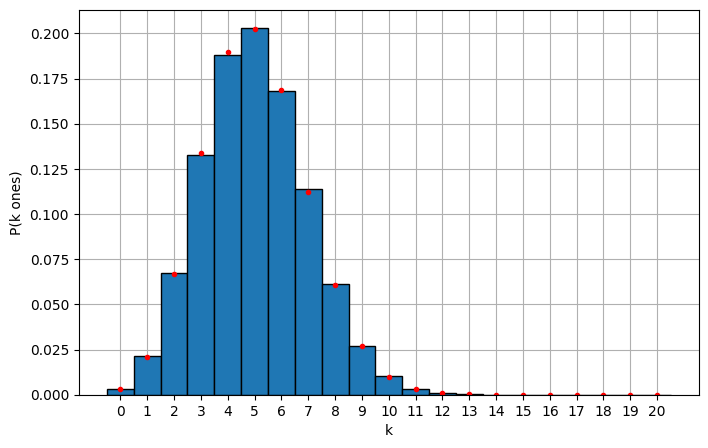

In [ ]:
K=100000 #number of simulation rounds

k_ones=np.zeros(n+1) #rounds with k=0,1,2,...,n ones

for r in range(K):
    results=np.random.uniform(0,1,n)
    k=np.sum(results<=p)#number of ones
    k_ones[k]+=1

pk_simu=k_ones/K #P(k ones)

k=np.arange(0,n+1,1)
plt.figure(figsize=(8,5))
plt.bar(k,pk_simu,width=1,edgecolor='k',zorder=2)
plt.plot(k,pk,'r.')
plt.grid()
plt.xticks(k)
plt.xlabel('k')
plt.ylabel('P(k ones)')
plt.show()

Ex 10  Calculate by simulation the probability that when
 f
 lipping a coin n times, the maximum number of consecutive heads is k = 1,2,...,n and draw a picture
 like below


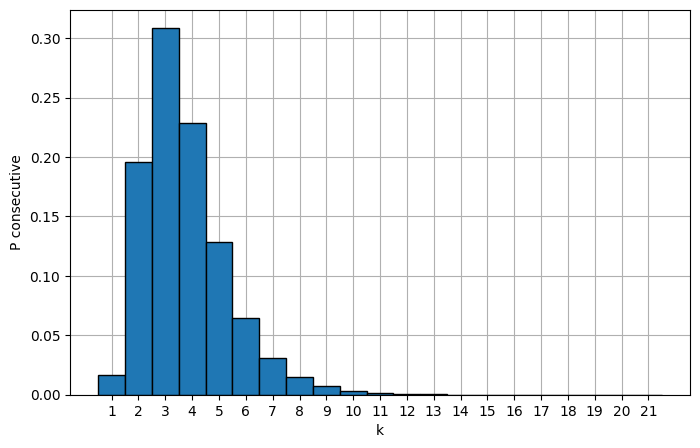

In [ ]:
K = 100000  # number of simulation rounds
N = 20

k_consecutive = np.zeros(N + 1)  # rounds with k=0,1,2,...,N ones

for r in range(K):
    results = np.random.randint(0, 2, N)
    if results[0] == 1:
      consecutive = 1
    else:
      consecutive = 0

    max_check = np.zeros(N)  # Reset max_check for each simulation round
    for n in range(1, N):
        if results[n - 1] == results[n] == 1:
            consecutive += 1
        elif results[n - 1] != results[n] != 1 and consecutive != 0:
            max_check[consecutive] = consecutive
            consecutive = 0

    b = int(np.max(max_check))
    k_consecutive[b] += 1

pk_simu = k_consecutive / K  # P(k consecutive)

k = np.arange(1, N + 2, 1)
plt.figure(figsize=(8, 5))
plt.bar(k, pk_simu, width=1, edgecolor='k', zorder=2)
plt.grid()
plt.xticks(k)
plt.xlabel('k')
plt.ylabel('P consecutive')
plt.show()

Ex 11 Problem of points

 A and B play a game which A wins with probability
 p and B with probability 1 − p. They continue until
 one of them has won N games. If A has won N − m
 games and B has won N −n games, then A wins the
 series (i.e wins m games before B wins n games) with
 probability

P=0.5:
0.08978271484375
P=0.4:
0.017509541478400007
P=0.6:
0.2792569872383999


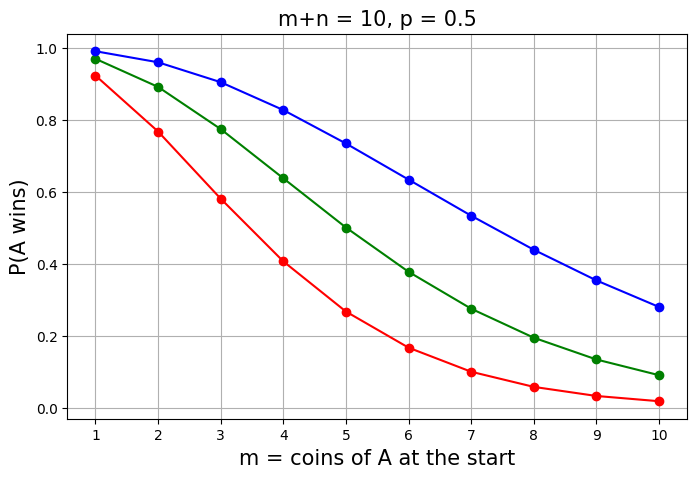

In [ ]:
def gr(p, m, n):
    total_prob = 0
    for r in range(m, m + n):
        pmn = comb(m + n - 1, r) * (p ** r) * ((1 - p) ** (m + n - 1 - r))
        total_prob += pmn
    return total_prob
#given data
p = 0.5
p1 = 0.4
p2 = 0.6
n = 5
N = 10
m = N - n

#Theory
tp = gr(p, N, n)
tp1 = gr(p1, N, n)
tp2 = gr(p2, N, n)
print('P=0.5:')
print(tp)
print('P=0.4:')
print(tp1)
print('P=0.6:')
print(tp2)
#Simulation
M = np.arange(1, N+1, 1)  # Start from 1
pm = np.zeros(N)
pm1 = np.zeros(N)
pm2 = np.zeros(N)

for i in range(N):
    pm[i] = gr(p, i+1, n)
    pm1[i] = gr(p1, i+1, n)
    pm2[i] = gr(p2, i+1, n)

plt.figure(figsize=(8, 5))
plt.plot(M, pm, 'g.-', markersize=12,label ='P=0.5')
plt.plot(M, pm1, 'r.-', markersize=12,label ='P=0.4')
plt.plot(M, pm2, 'b.-', markersize=12,label ='P=0.6')
plt.xticks(np.arange(1, N+1, 1))  # Set x-axis ticks to every integer from 1 to N
plt.yticks(np.arange(0, 1.2, 0.2))
plt.grid()
plt.xlabel('m = coins of A at the start', fontsize=15)
plt.ylabel('P(A wins)', fontsize=15)
plt.title('m+n = ' + str(N) + ', p = ' + str(p), fontsize=15)
plt.show()

Ex 12. Craps
 Player twrows two dice. If the sum is 7 or 11, player
 wins, and if the sum is 2,3 or 12, player loses. If sum
 is 4,5,6,8,9 or 10, player continues throwing the two
 dice until sum is the same as in the first throw and
 player wins, or the sum is 7 and player loses.
 Calculate by simulation the probability that player
 wins (ans. 0.493)

In [ ]:
k = 100000
win = 0
lose = 0


for i in range(k):
    first_time = True
    dice1value = np.random.randint(1, 7)
    first_throw1 = dice1value
    dice2value = np.random.randint(1, 7)
    first_throw2 = dice2value
    first_sum = first_throw1 + first_throw2
    sum = dice1value + dice2value

    if (sum == 7 or sum == 11) and first_time:
        win += 1
    elif (sum == 2 or sum == 3 or sum == 12) and first_time:
        lose += 1
    else:
        first_time = False
        while True:
            dice1value = np.random.randint(1, 7)
            dice2value = np.random.randint(1, 7)
            sum = dice1value + dice2value
            if sum == 7 and not first_time:
                lose += 1
                break
            elif sum == first_sum:
                win += 1
                break


win_probability = win / k
print("Probability of winning:", win_probability)

Probability of winning: 0.49402


Ex13. A and B arrive to a cafe at random times between
 9-10, and stay for 10 minutes. Calculate the probability that are in the cafe simultaneously using the picture below (ans: 0.305).
 Test by simulation (create arrival times (0...60 mi
nutes after 9) from uniform distribution).


In [ ]:
k = 100000
meet = 0

for i in range(k):
    arrival_time_A = np.random.uniform(0, 60)  # Arrival time for A between 0 and 60 minutes
    arrival_time_B = np.random.uniform(0, 60)  # Arrival time for B between 0 and 60 minutes

    if abs(arrival_time_A - arrival_time_B) <= 10:
        meet += 1

result = meet / k
print("Probability of meeting simultaneously:", result)

Probability of meeting simultaneously: 0.30342


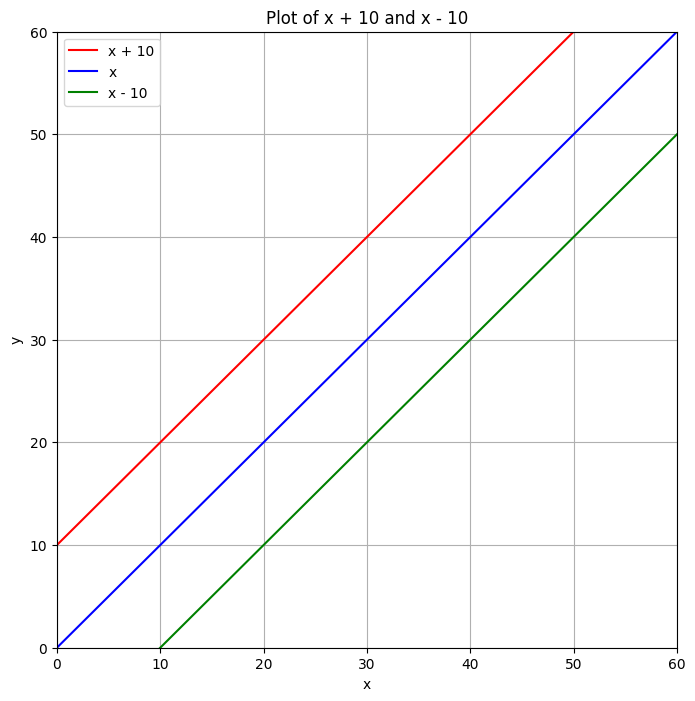

In [ ]:
# Define the range of x values
x = np.arange(0, 61)

# Define the functions
y1 = x + 10
y2 = x - 10
y = x
# Plot the functions
plt.figure(figsize=(8,8))
plt.plot(x, y1, 'r', label='x + 10')
plt.plot(x, y, 'b', label='x')
plt.plot(x, y2, 'g', label='x - 10')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(0, 60)
plt.xlim(0, 60)
plt.title('Plot of x + 10 and x - 10')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [ ]:
#Theoretical calculation
#Pmeet = area of meeting (between the line)/the area of square
Pmeet = (60**2-50**2)/60**2
print(Pmeet)

0.3055555555555556


**Ex** 14 draw the Gaussians

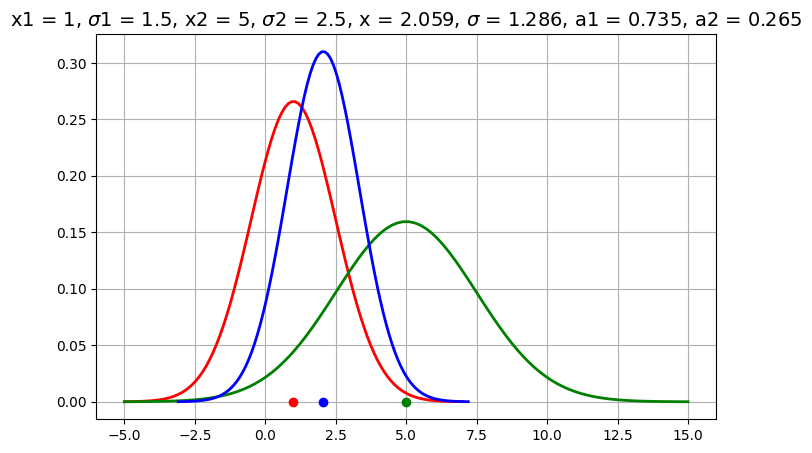

In [ ]:
mu1=1 #mean
sigma1=1.5 #standard deviation

mu2=5 #mean
sigma2=2.5 #standard deviation


a1 = sigma2**2 /(sigma1**2 + sigma2**2)

a2 = sigma1**2 /(sigma1**2 + sigma2**2)

sigma = np.sqrt((sigma1**2 *sigma2**2)/(sigma1**2 + sigma2**2))

mu3 = a1*mu1 + a2*mu2

#Gaussian
x1=np.linspace(mu1-4*sigma1,mu1+4*sigma1,100)
f1=1/(np.sqrt(2*np.pi)*sigma1)*np.exp(-1/2*((x1-mu1)/sigma1)**2)


x2=np.linspace(mu2-4*sigma2,mu2+4*sigma2,100)
f2=1/(np.sqrt(2*np.pi)*sigma2)*np.exp(-1/2*((x2-mu2)/sigma2)**2)

x=np.linspace(mu3-4*sigma,mu3+4*sigma,100)
f3=1/(np.sqrt(2*np.pi)*sigma)*np.exp(-1/2*((x-mu3)/sigma)**2)

plt.figure(figsize=(8,5))
plt.plot(x1,f1,'r',linewidth=2)
plt.plot(x2,f2,'g',linewidth=2)
plt.plot(x,f3,'b',linewidth=2)
plt.plot(mu1,0,'ro')
plt.plot(mu2,0,'go')
plt.plot(mu3,0,'bo')
plt.grid()
plt.xticks()
plt.title('x1 = '+str(mu1)+', $\sigma1$ = '+str(sigma1)
          + ', x2 = '+str(mu2)+', $\sigma2$ = '+str(sigma2)
          + ', x = '+str("{:.3f}".format(mu3))+', $\sigma$ = '+str("{:.3f}".format(sigma))
          + ', a1 = '+str("{:.3f}".format(a1))+', a2 = '+str("{:.3f}".format(a2)), fontsize=14)
plt.show()

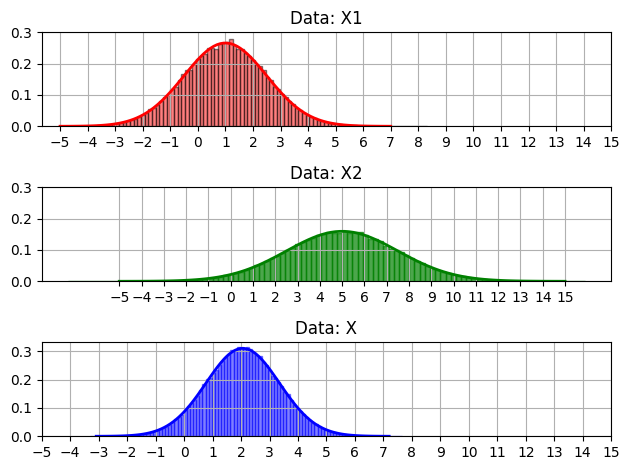

In [ ]:
n=100000
X1=np.random.normal(mu1,sigma1,n) #n  N(mu,sigma^2)-distributed numbers
X2=np.random.normal(mu2,sigma2,n)
X=np.random.normal(mu3,sigma,n)

# Create subplots
fig, axes = plt.subplots(3, 1)

# Plot histograms and PDFs
axes[0].hist(X1, bins=100, density=True, edgecolor='k', color='red', alpha=0.5)
axes[0].plot(x1, f1, 'r', lw=2)
axes[0].set_xticks(np.arange(-5, 16))
axes[0].set_yticks(np.linspace(0, 0.3, 4))
axes[0].set_title('Data: X1')

axes[1].hist(X2, bins=100, density=True, edgecolor='g', color='green', alpha=0.7)
axes[1].plot(x2, f2, 'g', lw=2)
axes[1].set_xticks(np.arange(-5, 16))
axes[1].set_yticks(np.linspace(0, 0.3, 4))
axes[1].set_title('Data: X2')

axes[2].hist(X, bins=100, density=True, edgecolor='b', color='blue', alpha=0.5)
axes[2].plot(x, f3, 'b', lw=2)
axes[2].set_xticks(np.arange(-5, 16))
axes[2].set_yticks(np.linspace(0, 0.3, 4))
axes[2].set_title('Data: X')

# Add grid and adjust layout
for ax in axes:
    ax.grid()
plt.tight_layout()
plt.show()


Ex 15 n items arrive to service such that the differences
 of arrival times are Exp(λ)-distributed and service times are uniformly distributed between d ± δ.
 There are m service stations and an item goes to the
 station next available (i.e the service of the previous
 item is completed).
 Given n,λ,d,δ ja m, simulate the arrivals and ser
vices and calculate the total service time, time when
 there is 0 items in service / waiting to be serviced and
 the averages of items being serviced / waiting to be
 serviced

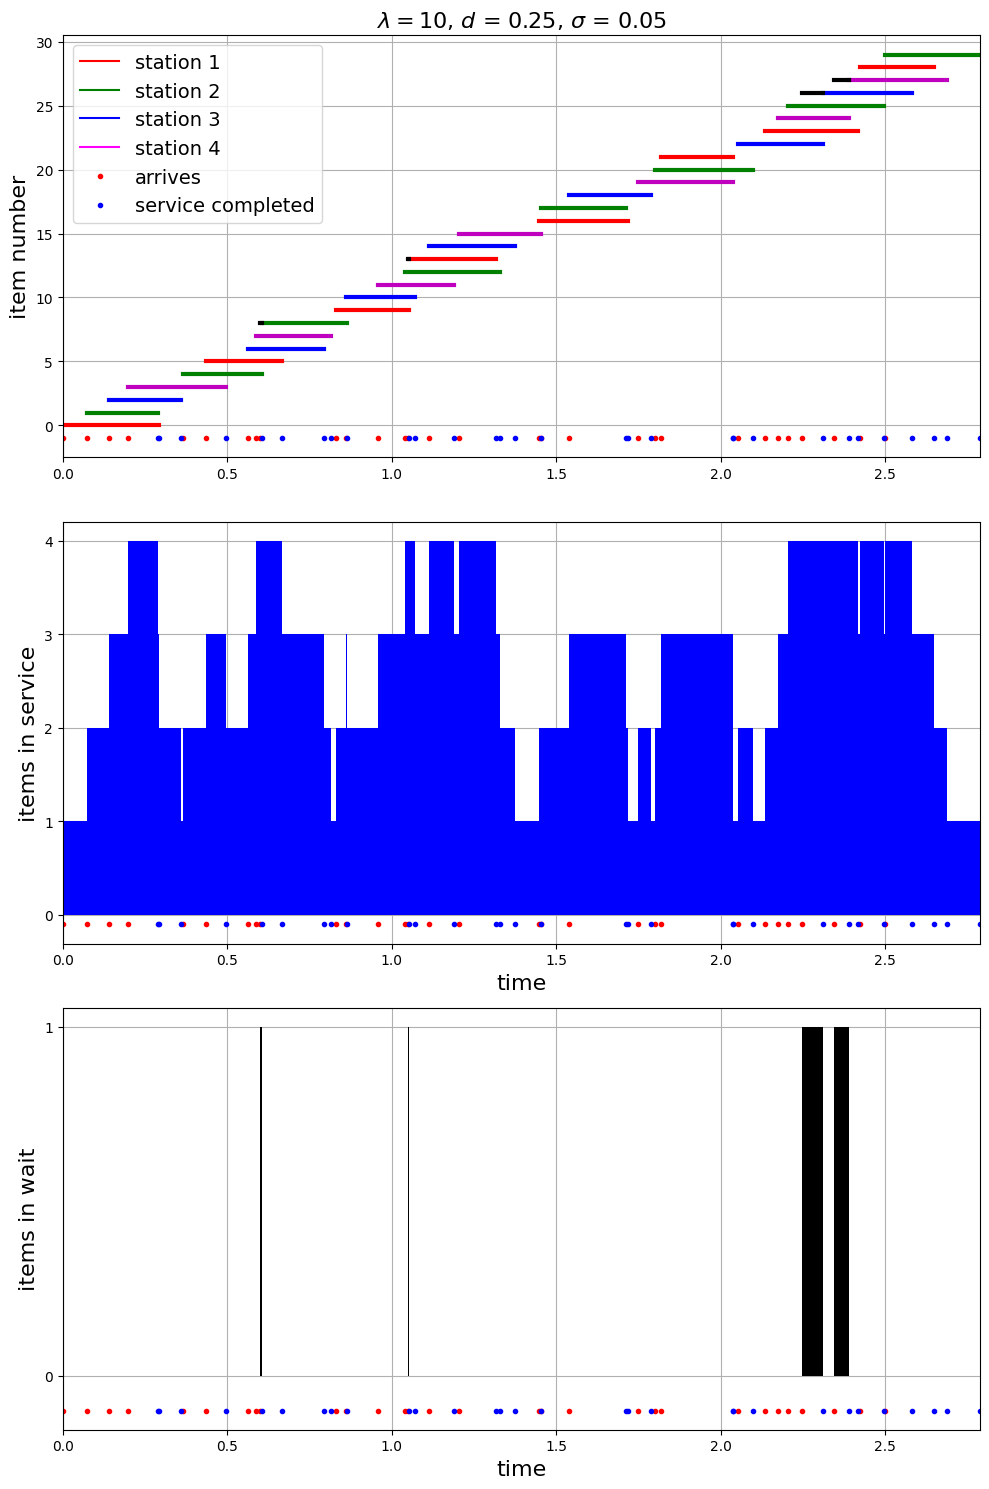

In [ ]:
from itertools import cycle
n = 30  # number of items
la = 10  # average number of arrivals in unit time interval

td = np.random.exponential(1 / la, n)  # Exp(la)-distributed arrival time differences

# service times, uniformly distributed between d-delta ... d+delta
d = 0.25
sigma = d/5
m = d - sigma
M = d + sigma
ts = np.random.uniform(m, M, n)  # duration of service
ms = 4  # station num


stations = np.zeros(ms)
ta = np.zeros(n)  # arrival times
tss = np.zeros(n)  # service start time
tw = np.zeros(n)  # time waiting
tsc = np.zeros(n)  # service completed times
station_order=np.zeros(n)
tss[0] = ta[0]
tsc[0]=ta[0]+ts[0]
stations[0]=tsc[0]
# Simulating the queueing system
for k in range(n - 1):
    ta[k + 1] = ta[k] + td[k]
    stk = np.argmin(stations)
    station_order[k+1]=np.argmin(stations)
    if stations[stk] <= ta[k+1]:
        tss[k + 1] = ta[k + 1] + (10**-10)
    else:
        tss[k + 1] = stations[stk] + (10**-10)

    tw[k+1] = max(0, tss[k+1] - ta[k+1])
    tsc[k + 1] = tss[k + 1] + ts[k + 1]
    stations[stk] = tsc[k + 1]

colors=['r','g','b','m']


tasc = np.hstack((ta, tss, tsc))  # arrival and service completed times
asc = np.hstack((np.zeros(n), np.ones(n), 2*np.ones(n)))  # 0 = arrives, 1 = service completed
tascs = np.sort(tasc)  # smallest->largest
ind = np.argsort(tasc)  # corresponding indices
asct = asc[ind]  # arrivals and service completions in time order
nis = np.zeros(3*n-1)  # number of items in service between asct time-intervals
niw = np.zeros(3*n-1)
nisp = 0  # previous number of items in service
niwp = 0
for k in range(3 * n - 1):
    if asct[k] == 0:  # Arrival
        nis[k] = nisp
        niw[k] = niwp + 1
    elif asct[k] == 2:  # Service completion
        nis[k] = nisp - 1
        niw[k] = niwp
    elif asct[k] == 1:  # Service start
        nis[k] = nisp + 1
        niw[k] = niwp - 1
    nisp = nis[k]
    niwp = niw[k]

# Arrival and service completion times visualization
plt.figure(figsize=(10, 15))

# First subplot: Arrival and service completion visualization
plt.subplot(311)
for k in range(n):
    plt.plot([tss[k], tsc[k]], [k, k], color=colors[int(station_order[k])], lw=3)
    plt.plot([ta[k], tss[k]], [k, k], 'black', lw=3)

plt.plot(-1, 0,color='red', label='station 1')
plt.plot(-1, 0,color='green', label='station 2')
plt.plot(-1, 0,color='blue', label='station 3')
plt.plot(-1, 0,color='magenta', label='station 4')
plt.plot(ta, -np.ones(n), 'r.', label='arrives')
plt.plot(tsc, -np.ones(n), 'b.', label='service completed')
plt.grid()
plt.legend(fontsize=14)
plt.title('$\lambda = $' + str(la) + r', $d$ = ' + str(d) + ', $\sigma$ = ' + str(sigma), fontsize=16)
plt.yticks(np.arange(0, n + 1, 5))
plt.ylabel('item number', fontsize=16)
plt.xlim(0,tsc[n-1])

# Second subplot: Number of items in service over time
plt.subplot(312)
plt.bar(tascs[:-1], nis, zorder=2, facecolor='b', align='edge', width=tascs[1:]-tascs[:-1])
plt.plot(ta, -0.1 + np.zeros(n), 'r.', label='start')
plt.plot(tsc, -0.1 + np.zeros(n), 'b.', label='end')
plt.grid()
plt.xlim(0, tascs[-1])
plt.yticks(np.arange(0, np.max(nis) + 1, 1))
plt.ylabel('items in service', fontsize=16)
plt.xlabel('time', fontsize=16)

plt.subplot(313)
plt.bar(tascs[:-1], niw, zorder=2, facecolor='black', align='edge', width=tascs[1:]-tascs[:-1])
plt.plot(ta, -0.1 + np.zeros(n), 'r.', label='start')
plt.plot(tsc, -0.1 + np.zeros(n), 'b.', label='end')
plt.grid()
plt.xlim(0, tascs[-1])
plt.yticks(np.arange(0, np.max(niw) + 1, 1))
plt.ylabel('items in wait', fontsize=16)
plt.xlabel('time', fontsize=16)

plt.tight_layout()
plt.show()

In [ ]:
#%% time intervals, when 0 items in service
t0_end=tascs[1:][nis==0]
t0_start=tascs[:-1][nis==0]
zero=np.sum(t0_end-t0_start) #time when 0 items at service
print(zero)
maxk=np.max(nis) #max number of items at service
print(maxk)
total_time=tascs[-1] #total service time
print(total_time)
mean_in_service=np.sum((tascs[1:]-tascs[:-1])*nis)/total_time #average number of items in service
print(mean_in_service)

0.34141379646733183
4.0
3.6734179744040802
2.0159997999512442


In [ ]:
#%% time intervals, when 0 items in wait
t0_end=tascs[1:][niw==0]
t0_start=tascs[:-1][niw==0]
zero=np.sum(t0_end-t0_start) #time when 0 items at wait
print(zero)
maxk=np.max(niw) #max number of items at wait
print(maxk)
total_time=tascs[-1] #total service time wait
print(total_time)
mean_in_service=np.sum((tascs[1:]-tascs[:-1])*niw)/total_time #average number of items in wait
print(mean_in_service)

3.478283621808338
3.0
3.6734179744040802
0.07390947144665348


Ex 16


In [ ]:
def ellipse2D(mu,S,p):
    vals,vect=np.linalg.eig(S) #eigenvalues  and -vectors of S)
    la1=vals[0]
    la2=vals[1]
    u=vect[:,0]
    v=vect[:,1]
    a=np.sqrt(p*la1)
    b=np.sqrt(p*la2)
    t=np.linspace(0,2*np.pi,100)
    co=np.cos(t)
    si=np.sin(t)
    x=mu[0,0]+a*co*u[0]+b*si*v[0]
    y=mu[1,0]+a*co*u[1]+b*si*v[1]
    return x,y


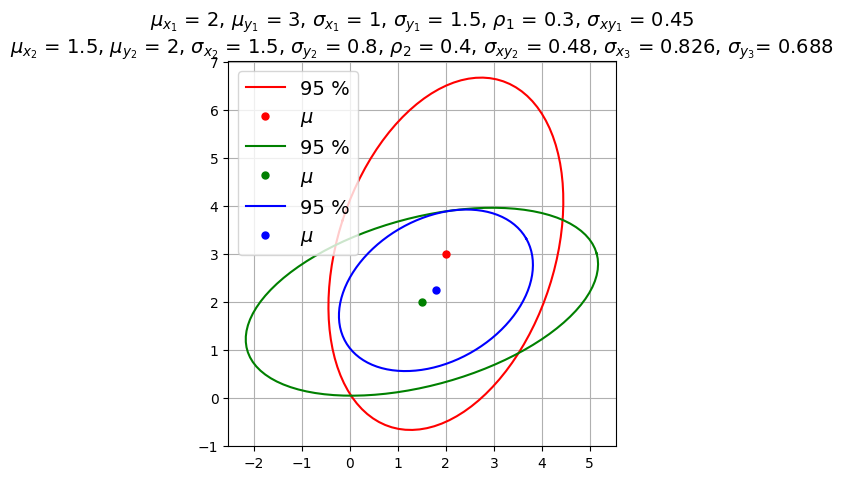

In [ ]:
#%% 2D-normal distribution, p.75

#mean1
mux1=2
muy1=3
mu1=np.array([[mux1,muy1]]).T #(2,1)
#standard deviations1
sigmax1=1
sigmay1=1.5
#correlation coefficient1
rho1=0.3
#covariance1
sigmaxy1=rho1*sigmax1*sigmay1


#mean2
mux2=1.5
muy2=2
mu2=np.array([[mux2,muy2]]).T #(2,1)
#standard deviations1
sigmax2=1.5
sigmay2=0.8
#correlation coefficient1
rho2=0.4
#covariance1
sigmaxy2=rho2*sigmax2*sigmay2



#covariance matrix 1
S1=np.array([[sigmax1**2,sigmaxy1],
            [sigmaxy1,sigmay1**2]])

#covariance matrix 2
S2=np.array([[sigmax2**2,sigmaxy2],
            [sigmaxy2,sigmay2**2]])

#coefficient of filter zone
A1 = S2@np.linalg.inv(S1+S2)
A2 = S1@np.linalg.inv(S1+S2)
mu3 = A1@mu1 + A2@mu2
S3 = S2@np.linalg.inv(S1+S2)@S1
sigmax3 = np.sqrt(S3[0,0])
sigmay3 = np.sqrt(S3[1,1])
#ellipses
p=6.0
x1,y1=ellipse2D(mu1,S1,p) #95 %
x2,y2=ellipse2D(mu2,S2,p) #95 %
x3,y3=ellipse2D(mu3,S3,p) #95 %


plt.figure(figsize=(5,5))
plt.plot(x1,y1,'r',label='95 %')
plt.plot(mux1,muy1,'ro',markersize=5,label='$\mu$')
plt.plot(x2,y2,'g',label='95 %')
plt.plot(mux2,muy2,'go',markersize=5,label='$\mu$')
plt.plot(x3,y3,'b',label='95 %')
plt.plot(mu3[0],mu3[1],'bo',markersize=5,label='$\mu$')
plt.grid()
plt.legend(fontsize=14)
plt.axis('equal')
plt.title('$\mu_{x_1}$ = '+str(mux1)+', $\mu_{y_1}$ = '+str(muy1)+
          ', $\sigma_{x_1}$ = '+str(sigmax1)+', $\sigma_{y_1}$ = '+str(sigmay1)+
          r', $\rho_1$ = '+str(rho1)+
          ', $\sigma_{{xy_1}}$ = {:.2f}'.format(sigmaxy1) +
          '\n$\mu_{x_2}$ = '+str(mux2)+', $\mu_{y_2}$ = '+str(muy2)+
          ', $\sigma_{x_2}$ = '+str(sigmax2)+', $\sigma_{y_2}$ = '+str(sigmay2)+
          r', $\rho_2$ = '+str(rho2)+
          ', $\sigma_{{xy_2}}$ = {:.2f}'.format(sigmaxy2) +
          ', $\sigma_{{x_3}}$ = {:.3f}'.format(sigmax3) +', $\sigma_{{y_3}}$= {:.3f}'.format(sigmay3), fontsize=14)


plt.show()

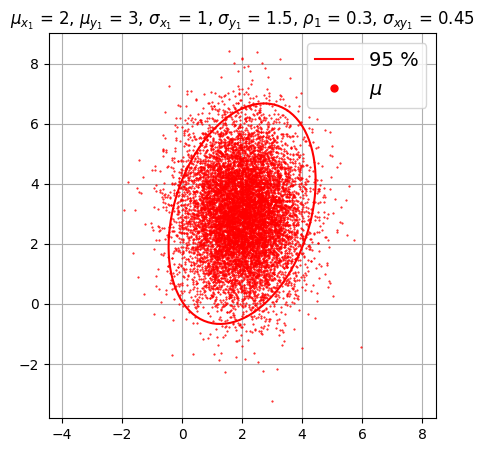

In [ ]:
N = 10000
x1m = np.random.normal(mux1, sigmax1, N)
y1m = np.random.normal(muy1, sigmay1, N)

plt.figure(figsize=(5,5))
plt.plot(x1m, y1m, 'r.', markersize=1)
plt.plot(x1, y1, 'r', label='95 %')
plt.plot(mux1, muy1, 'ro', markersize=5, label='$\mu$')
plt.grid()
plt.legend(fontsize=14)
plt.axis('equal')
plt.title('$\mu_{x_1}$ = '+str(mux1)+', $\mu_{y_1}$ = '+str(muy1)+
          ', $\sigma_{x_1}$ = '+str(sigmax1)+', $\sigma_{y_1}$ = '+str(sigmay1)+
          r', $\rho_1$ = '+str(rho1)+
          ', $\sigma_{{xy_1}}$ = {:.2f}'.format(sigmaxy1))
plt.show()

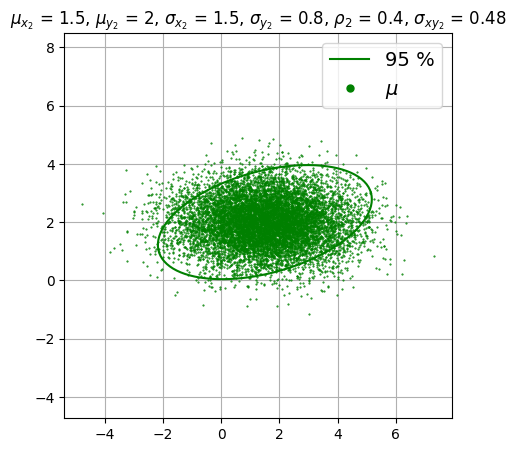

In [ ]:
N = 10000
x2m = np.random.normal(mux2, sigmax2, N)
y2m = np.random.normal(muy2, sigmay2, N)

plt.figure(figsize=(5,5))
plt.plot(x2m, y2m, 'g.', markersize=1)
plt.plot(x2, y2, 'g', label='95 %')
plt.plot(mux2, muy2, 'go', markersize=5, label='$\mu$')
plt.grid()
plt.legend(fontsize=14)
plt.axis('equal')
plt.title('$\mu_{x_2}$ = '+str(mux2)+', $\mu_{y_2}$ = '+str(muy2)+
          ', $\sigma_{x_2}$ = '+str(sigmax2)+', $\sigma_{y_2}$ = '+str(sigmay2)+
          r', $\rho_2$ = '+str(rho2)+
          ', $\sigma_{{xy_2}}$ = {:.2f}'.format(sigmaxy2))
plt.show()

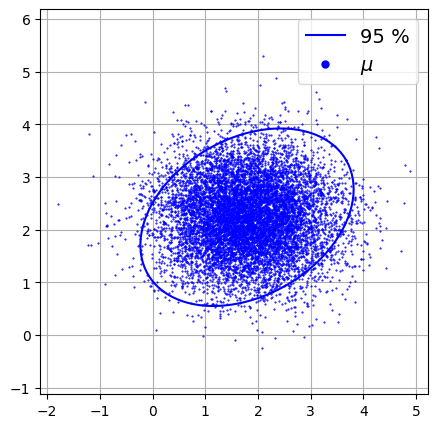

In [ ]:
N = 10000
xm = np.random.normal(mu3[0], sigmax3, N)
ym = np.random.normal(mu3[1], sigmay3, N)

plt.figure(figsize=(5,5))
plt.plot(xm, ym, 'b.', markersize=1)
plt.plot(x3, y3, 'b', label='95 %')
plt.plot(mu3[0],mu3[1],'bo',markersize=5,label='$\mu$')
plt.grid()
plt.legend(fontsize=14)
plt.axis('equal')
plt.show()